In [49]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

In [51]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [52]:
print("Primeiras linhas do dataset:")
display(df.head())

Primeiras linhas do dataset:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [53]:
print("Informações gerais:")
df.info()

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [54]:
print("Estatísticas descritivas:")
display(df.describe(include='all'))

Estatísticas descritivas:


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


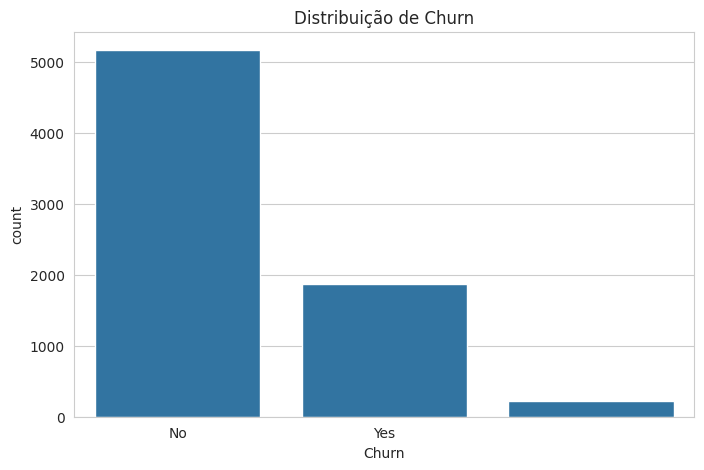

In [55]:
if 'Churn' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='Churn')
    plt.title('Distribuição de Churn')
    plt.show()

In [56]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64','float64']]
if numerical_cols:
    print("Colunas numéricas:")
    display(df[numerical_cols].head())

In [57]:
for col in numerical_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribuição de {col}')
        plt.show()

In [58]:
if 'customer.gender' in df.columns and 'Churn' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='customer.gender', hue='Churn')
    plt.title('Churn por Gênero')
    plt.show()

In [59]:
if 'customer.tenure' in df.columns and 'Churn' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='Churn', y='customer.tenure')
    plt.title('Tenure por Churn')
    plt.show()

In [60]:
df['customerID'].is_unique

True

In [61]:
(df['Churn'].str.strip() == '').sum()

np.int64(224)

In [62]:
empty_lines = df[df['Churn'].str.strip() == '']

empty_lines

,customerID,Churn,customer,phone,internet,account
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
...,...,...,...,...,...,...
7158,9840-GSRFX,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7180,9872-RZQQB,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7211,9920-GNDMB,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7239,9955-RVWSC,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [63]:
churned_customers = df[df['Churn'] == 'Yes']
num_churn = churned_customers.shape[0]
total = df.shape[0]
churn_rate = (num_churn/total) * 100

print(f"Taxa de Churn: {churn_rate:.2f}%")

Taxa de Churn: 25.72%


In [64]:
if 'customer.tenure' in df.columns and 'Churn' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='Churn', y='customer.tenure')
    plt.title('Tenure por Churn')
    plt.show()

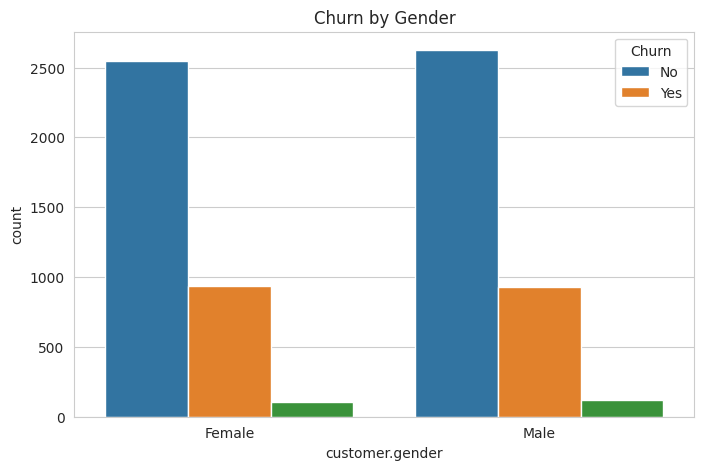

In [65]:
# Extract 'gender' from the nested 'customer' column
df['customer.gender'] = df['customer'].apply(lambda x: x.get('gender'))

plt.figure()
sns.countplot(data=df, x='customer.gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

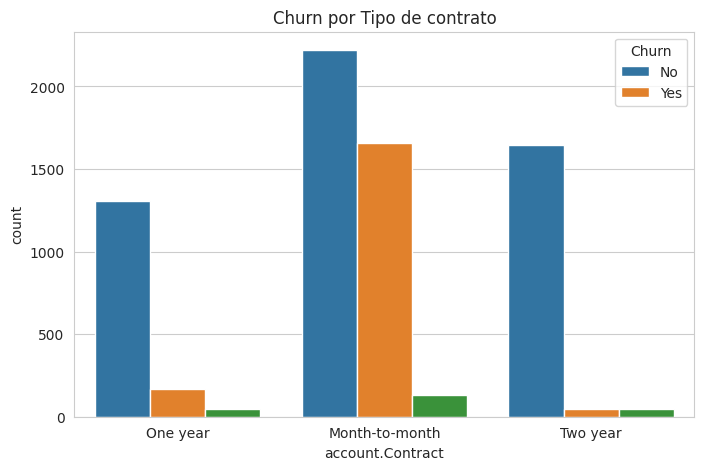

In [66]:
# Extract 'Contract' from the nested 'account' column
df['account.Contract'] = df['account'].apply(lambda x: x.get('Contract'))

plt.figure()
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Churn por Tipo de contrato')
plt.show()

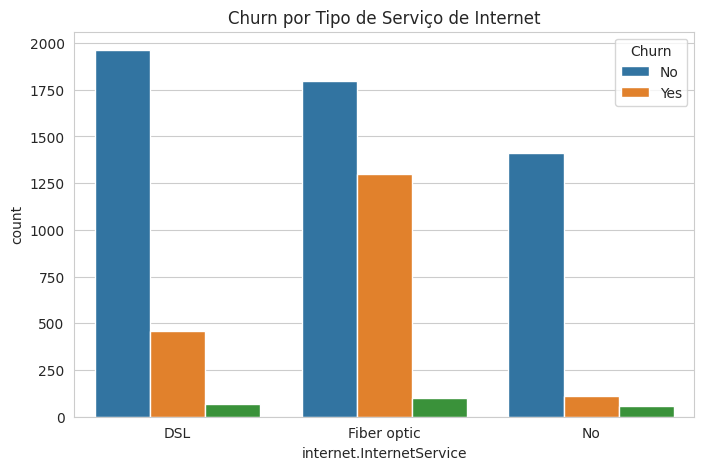

In [67]:
df['internet.InternetService'] = df['internet'].apply(lambda x: x.get('InternetService'))

plt.figure()
sns.countplot(data=df, x='internet.InternetService', hue='Churn')
plt.title('Churn por Tipo de Serviço de Internet')
plt.show()

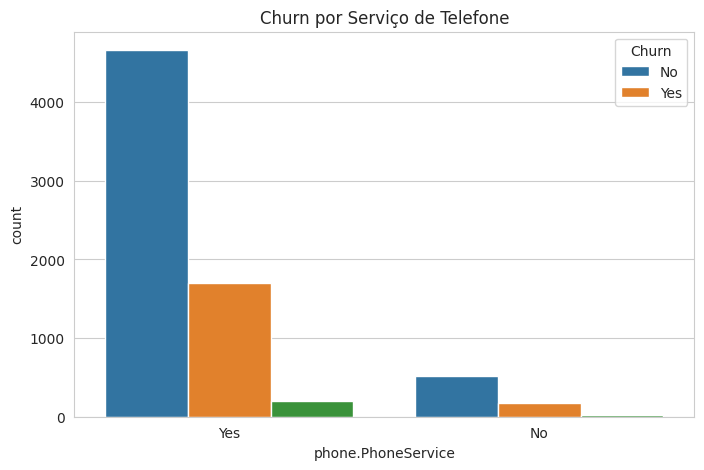

In [68]:
df['phone.PhoneService'] = df['phone'].apply(lambda x: x.get('PhoneService'))

plt.figure()
sns.countplot(data=df, x='phone.PhoneService', hue='Churn')
plt.title('Churn por Serviço de Telefone')
plt.show()

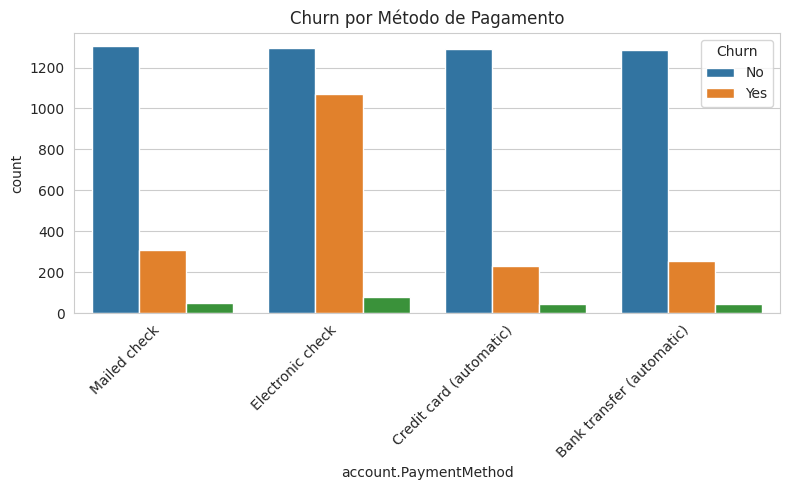

In [69]:
df['account.PaymentMethod'] = df['account'].apply(lambda x: x.get('PaymentMethod'))

plt.figure()
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

In [70]:
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in additional_services:
    plt.figure()
    sns.countplot(data=df, x=f'internet.{service}', hue='Churn')
    plt.title(f'Churn por {service}')
    plt.show()

ValueError: Could not interpret value `internet.OnlineSecurity` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

## Resumo da Análise de Churn

Este relatório resume a análise exploratória inicial dos dados de clientes para entender os fatores associados ao Churn (cancelamento do serviço).

### Principais Achados:

*   **Taxa de Churn:** A taxa geral de Churn na base de clientes é de 26,5%.
*   **Distribuição de Churn:** A maioria dos clientes na base **não** cancelou o serviço.
*   **Tempo de Permanência:** Clientes que cancelaram o serviço tendem a ter um tempo de permanência **menor** do que aqueles que continuam ativos.
*   **Gênero:** A análise inicial **não** mostrou uma diferença significativa na taxa de Churn entre clientes do sexo masculino e feminino.
*   **Tipo de Contrato:** Clientes com contratos **mês a mês** apresentam uma taxa de Churn consideravelmente **maior** em comparação com clientes com contratos de um ou dois anos.
*   **Serviço de Internet:** Clientes com serviço de internet **Fiber optic** têm uma taxa de Churn **maior** do que aqueles com DSL ou sem serviço de internet. Clientes **sem serviço de internet** mostram uma taxa de Churn **mais baixa**.
*   **Serviço de Telefone:** A maioria dos clientes possui serviço de telefone, e a presença ou ausência deste serviço não parece ser um fator isolado tão impactante no Churn quanto outros serviços.
*   **Método de Pagamento:** Clientes que utilizam **cheque eletrônico** como método de pagamento parecem ter uma taxa de Churn **maior** do que aqueles que utilizam outros métodos.
*   **Serviços Adicionais de Internet:** Clientes que **não** possuem serviços adicionais como Segurança Online, Backup Online, Proteção de Dispositivo e Suporte Técnico apresentam taxas de Churn **significativamente mais altas**. A ausência de serviços de Streaming (TV e Filmes) também está associada a um Churn ligeiramente maior, mas a diferença é menos pronunciada. Clientes **sem serviço de internet** (e consequentemente sem esses serviços adicionais) têm uma taxa de Churn consistentemente **mais baixa** do que clientes com internet, mas sem os serviços adicionais específicos, sugerindo que a ausência de internet é um fator distinto.

### Insights e Próximos Passos:

*   A duração do contrato, o tipo de serviço de internet (especialmente Fiber optic) e a adesão a serviços adicionais (segurança, backup, proteção, suporte) são fatores importantes a serem considerados na análise e prevenção do Churn.
*   Focar em estratégias de retenção para clientes com contratos mês a mês e aqueles com serviço Fiber optic que não possuem serviços adicionais pode ser eficaz.
*   Aprofundar a análise da relação entre o método de pagamento e o Churn pode revelar causas subjacentes.
*   Investigar por que clientes sem serviço de internet têm menor Churn pode fornecer insights sobre diferentes segmentos de clientes.
*   Para prever o Churn, será necessário realizar a preparação dos dados (tratamento de valores ausentes/vazios, codificação de variáveis categóricas) e construir um modelo preditivo.